In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Read datasets
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

## Looking at the first 5 books

In [3]:
books.head()  # view first 5 books data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head(5) # view first 5 ratings data

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [5]:
users.head(5) # view first 5 users data

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## Looking at the shape of each dataframes

In [6]:
# showing the number of rows and cols
print(f"Shape of books_df : {books.shape}")
print(f"Shape of ratings_df : {ratings.shape}")
print(f"Shape of users_df : {users.shape}")

Shape of books_df : (7941, 8)
Shape of ratings_df : (111190, 3)
Shape of users_df : (54295, 3)


##Info

In [7]:
# showing the compact summary of each variables
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7941 entries, 0 to 7940
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 7941 non-null   object
 1   Book-Title           7941 non-null   object
 2   Book-Author          7941 non-null   object
 3   Year-Of-Publication  7941 non-null   int64 
 4   Publisher            7941 non-null   object
 5   Image-URL-S          7941 non-null   object
 6   Image-URL-M          7940 non-null   object
 7   Image-URL-L          7940 non-null   object
dtypes: int64(1), object(7)
memory usage: 496.4+ KB


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111190 entries, 0 to 111189
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      111190 non-null  int64  
 1   ISBN         111190 non-null  object 
 2   Book-Rating  111189 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54295 entries, 0 to 54294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   54295 non-null  int64  
 1   Location  54294 non-null  object 
 2   Age       32680 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


## Changing the datatypes

In [10]:
#ganti dtype

books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce').astype('Int64')
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7941 entries, 0 to 7940
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 7941 non-null   object
 1   Book-Title           7941 non-null   object
 2   Book-Author          7941 non-null   object
 3   Year-Of-Publication  7941 non-null   Int64 
 4   Publisher            7941 non-null   object
 5   Image-URL-S          7941 non-null   object
 6   Image-URL-M          7940 non-null   object
 7   Image-URL-L          7940 non-null   object
dtypes: Int64(1), object(7)
memory usage: 504.2+ KB


## Checking for duplicates

In [11]:
books.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

In [13]:
users.duplicated().sum()

0

## Check if there are any missing values

In [14]:
books.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,1
Image-URL-L,1


In [15]:
ratings.isna().sum()

,0
User-ID,0
ISBN,0
Book-Rating,1


In [16]:
users.isna().sum()

,0
User-ID,0
Location,1
Age,21615


## Handling missing values

In [17]:
books[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [18]:
books.loc[118033, 'Book-Author'] = 'Unknown'
books.loc[187689, 'Book-Author'] = 'Downes, Larissa Anne'

In [19]:
books[books['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,NaN,NaN,Unknown,<NA>,NaN,NaN,NaN,NaN
187689,NaN,NaN,"Downes, Larissa Anne",<NA>,NaN,NaN,NaN,NaN


In [20]:
books.loc[128890, 'Publisher'] = 'Mundania Press'
books.loc[129037, 'Publisher'] = 'CreateSpace Independent Publishing Platform'

In [21]:
books[books['Year-Of-Publication'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,NaN,NaN,Unknown,<NA>,NaN,NaN,NaN,NaN
187689,NaN,NaN,"Downes, Larissa Anne",<NA>,NaN,NaN,NaN,NaN
128890,NaN,NaN,NaN,<NA>,Mundania Press,NaN,NaN,NaN
129037,NaN,NaN,NaN,<NA>,CreateSpace Independent Publishing Platform,NaN,NaN,NaN


In [22]:
books.loc[209538, 'Book-Author'] = 'Michael Teitelbaum'
books.loc[209538, 'Year-Of-Publication'] = 2000
books.loc[209538, 'Publisher'] = 'DK Publishing Inc'

books.loc[220731, 'Book-Author'] = 'Jean-Marie Gustave Le Clézio'
books.loc[220731, 'Year-Of-Publication'] = 2003
books.loc[220731, 'Publisher'] = 'Gallimard'

books.loc[221678, 'Book-Author'] = 'James Buckle'
books.loc[221678, 'Year-Of-Publication'] = 2000
books.loc[221678, 'Publisher'] = 'DK Publishing Inc'

In [23]:
books.isna().sum()

,0
ISBN,7
Book-Title,7
Book-Author,2
Year-Of-Publication,4
Publisher,2
Image-URL-S,7
Image-URL-M,8
Image-URL-L,8


In [24]:
users.drop(columns=['Age'], inplace=True)

##Tanganin year aneh

In [25]:
books[books['Year-Of-Publication'] == 0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
7601,0316095133,Evening Class,Maeve Binchy,0,Little Brown Company,http://images.amazon.com/images/P/0316095133.0...,http://images.amazon.com/images/P/0316095133.0...,http://images.amazon.com/images/P/0316095133.0...
7641,5553531144,Human Dignity and Freedom-25.95,Universe Publishing Co,0,First Glance Books,http://images.amazon.com/images/P/5553531144.0...,http://images.amazon.com/images/P/5553531144.0...,http://images.amazon.com/images/P/5553531144.0...
7761,0140060324,White Hotel,D M Thomas,0,Penguin Putnam~trade,http://images.amazon.com/images/P/0140060324.0...,http://images.amazon.com/images/P/0140060324.0...,http://images.amazon.com/images/P/0140060324.0...
7762,0091841844,Lucias Measure,Angela Malone,0,Trafalgar Square,http://images.amazon.com/images/P/0091841844.0...,http://images.amazon.com/images/P/0091841844.0...,http://images.amazon.com/images/P/0091841844.0...


In [26]:
clean_books = books[books['Year-Of-Publication'] != 0]
clean_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
7939,0671024094,The Coffin Dancer (Lincoln Rhyme Novels (Paper...,Jeffery Deaver,1999,Pocket Books,http://images.amazon.com/images/P/0671024094.0...,http://images.amazon.com/images/P/0671024094.0...,http://images.amazon.com/images/P/0671024094.0...
7940,1565070054,"As Time Goes by (California Series, Book 2)",Lori Wick,1992,Harvest House Pub,http://images.amazon.com/images,NaN,NaN
209538,NaN,NaN,Michael Teitelbaum,2000,DK Publishing Inc,NaN,NaN,NaN
220731,NaN,NaN,Jean-Marie Gustave Le Clézio,2003,Gallimard,NaN,NaN,NaN


In [27]:
clean_books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:30]

,count
Year-Of-Publication,
2005,1
2004,184
2003,568
2002,742
2001,656
2000,651
1999,599
1998,503
1997,500


In [28]:
clean_books['Year-Of-Publication'].value_counts().sort_index().iloc[:20]

,count
Year-Of-Publication,
1920,3
1937,1
1940,1
1941,1
1942,1
1950,1
1951,1
1952,2
1953,1


In [29]:
weird_year = clean_books[clean_books['Year-Of-Publication'] >= 2024]
weird_year

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [30]:
#'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'
clean_books.loc[37487, 'Year-Of-Publication'] = 1991

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
clean_books.loc[37487, 'Book-Author'] = 'Bruce Coville'

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
clean_books.loc[55676, 'Year-Of-Publication'] = 2005

# Crossing America
clean_books.loc[78168, 'Year-Of-Publication'] = 2001

# "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"
clean_books.loc[80264, 'Year-Of-Publication'] = 2003

# Outline of European Architecture (Pelican S.)
clean_books.loc[97826, 'Year-Of-Publication'] = 1981

# Three Plays of Eugene Oneill
clean_books.loc[116053, 'Year-Of-Publication'] = 1995

# Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.
clean_books.loc[118294, 'Year-Of-Publication'] = 2023

# 'Field Guide to the Birds of North America, 3rd Ed.'
clean_books.loc[192993, 'Year-Of-Publication'] = 2003

# FOREST PEOPLE (Touchstone Books (Hardcover))
clean_books.loc[228173, 'Year-Of-Publication'] = 1987

# In Our Time: Stories (Scribner Classic)
clean_books.loc[240169, 'Year-Of-Publication'] = 1996

# CLOUT
clean_books.loc[246842, 'Year-Of-Publication'] = 1925

# To Have and Have Not
clean_books.loc[255409, 'Year-Of-Publication'] = 1937

# FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS
clean_books.loc[260974, 'Year-Of-Publication'] = 1991

<ipython-input-30-3536fc3f78db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_books.loc[37487, 'Year-Of-Publication'] = 1991


In [31]:
# Count how many books each author wrote
clean_books['Book-Author'].value_counts().head(20)

,count
Book-Author,
Stephen King,57
Nora Roberts,41
Mary Higgins Clark,32
James Patterson,30
Dean R. Koontz,27
John Grisham,27
Sandra Brown,25
Tom Clancy,24
Jane Austen,23


In [32]:
# Remove the missing values
clean_books = clean_books[clean_books['Book-Author'] != 'Not Applicable (Na )']

## Grafik

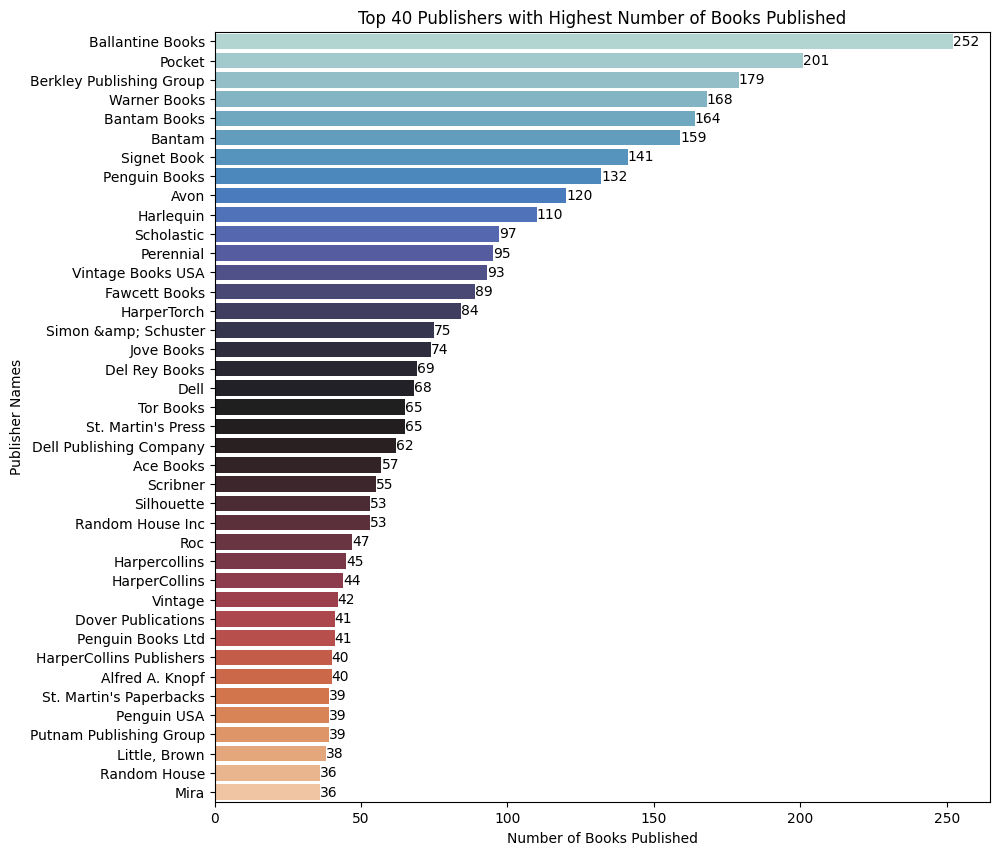

In [33]:
# Group by 'Publisher' and count the number of books (Book_Title)
publisher_count = clean_books.groupby('Publisher')['Book-Title'].count().reset_index()

# Rename the column
publisher_count.columns = ['Publisher', 'Number_of_Books']

# Sort publishers by the number of books in descending order
top_publisher = publisher_count.sort_values(by='Number_of_Books', ascending=False).head(40)

# Plotting the bar chart
plt.figure(figsize=(10, 10))
bar_plot = sns.barplot(x='Number_of_Books', y='Publisher', data=top_publisher, hue='Publisher', palette='icefire', legend=False)

# Customize the label of plot
plt.title('Top 40 Publishers with Highest Number of Books Published')
plt.xlabel('Number of Books Published')
plt.ylabel('Publisher Names')

# Add details
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{int(p.get_width())}',  #Convert width to int for details
        (p.get_width(), p.get_y() + p.get_height() / 2),  #Positioning of the details
        ha='left',  #Horizontal alignment
        va='center',  #Vertical alignment
        color='black',
        fontsize=10
    )

# Display the plot
plt.show()


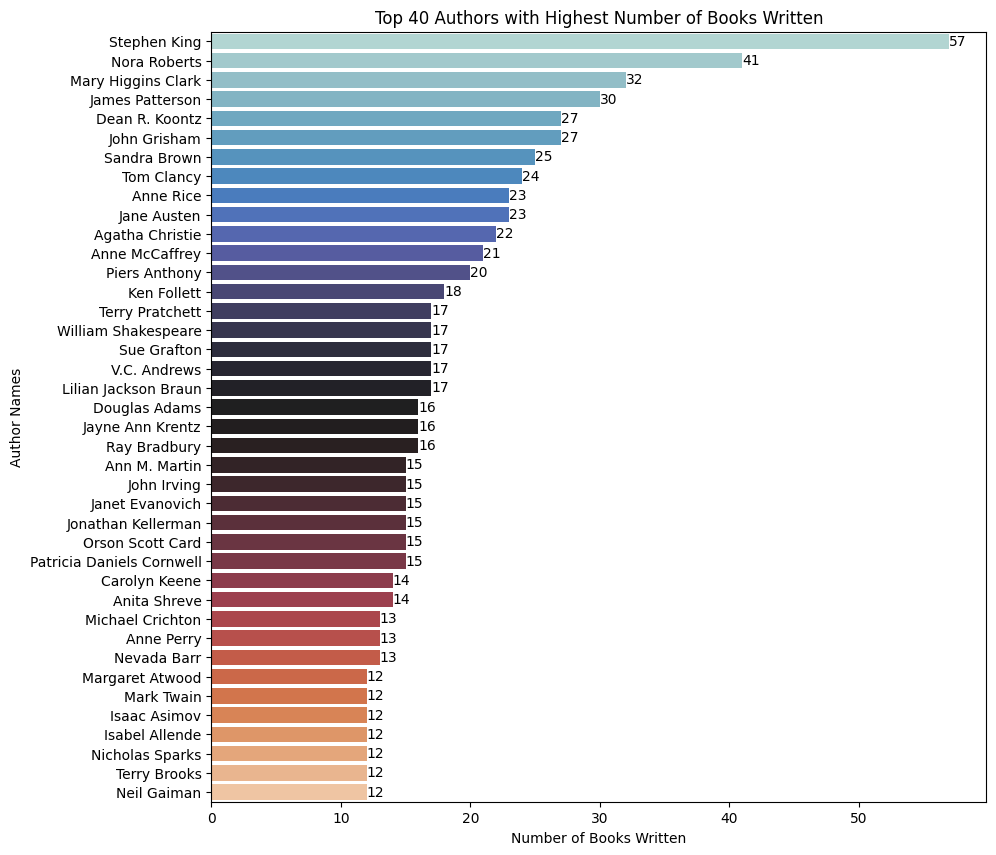

In [34]:
# Group by 'Author' and count the number of books (Book_Title)
author_book_count = clean_books.groupby('Book-Author')['Book-Title'].count().reset_index()

# Rename the column
author_book_count.columns = ['Author', 'Number_of_Books']

# Sort authors by the number of books in descending order
top_authors = author_book_count.sort_values(by='Number_of_Books', ascending=False).head(40)

# Plotting the bar chart
plt.figure(figsize=(10, 10))
bar_plot = sns.barplot(x='Number_of_Books', y='Author', data=top_authors, hue='Author', palette='icefire', legend=False)

# Customize the label of plot
plt.title('Top 40 Authors with Highest Number of Books Written')
plt.xlabel('Number of Books Written')
plt.ylabel('Author Names')

# Add details
for p in bar_plot.patches:
    bar_plot.annotate(
        int(p.get_width()),  #Convert width to int for details
        (p.get_width(), p.get_y() + p.get_height() / 2),  #Positioning of the details
        ha='left',  #Horizontal alignment
        va='center', #Vertical alignment
        color='black',
        fontsize=10
    )

# Display the plot
plt.show()

In [35]:
#Calculate the total number of books
total_books = len(clean_books)

#Calculate the percentage of books for each author
author_percentage = clean_books['Book-Author'].value_counts() /total_books * 100

#Create a DataFrame from the author percentages
author_percentage_df = pd.DataFrame({'Author': author_percentage.index, 'Percentage': author_percentage.values})

#Sort the DataFrame by percentage in descending order
author_percentage_df = author_percentage_df.sort_values(by='Percentage', ascending=False)

author_percentage_df

,Author,Percentage
0,Stephen King,0.730395
1,Nora Roberts,0.525372
2,Mary Higgins Clark,0.410046
3,James Patterson,0.384418
4,Dean R. Koontz,0.345976
...,...,...
2259,Conor Cruise O'Brien,0.012814
2260,Jim Hightower,0.012814
2261,Daphne du Maurier,0.012814
2262,Cheryl Landon,0.012814


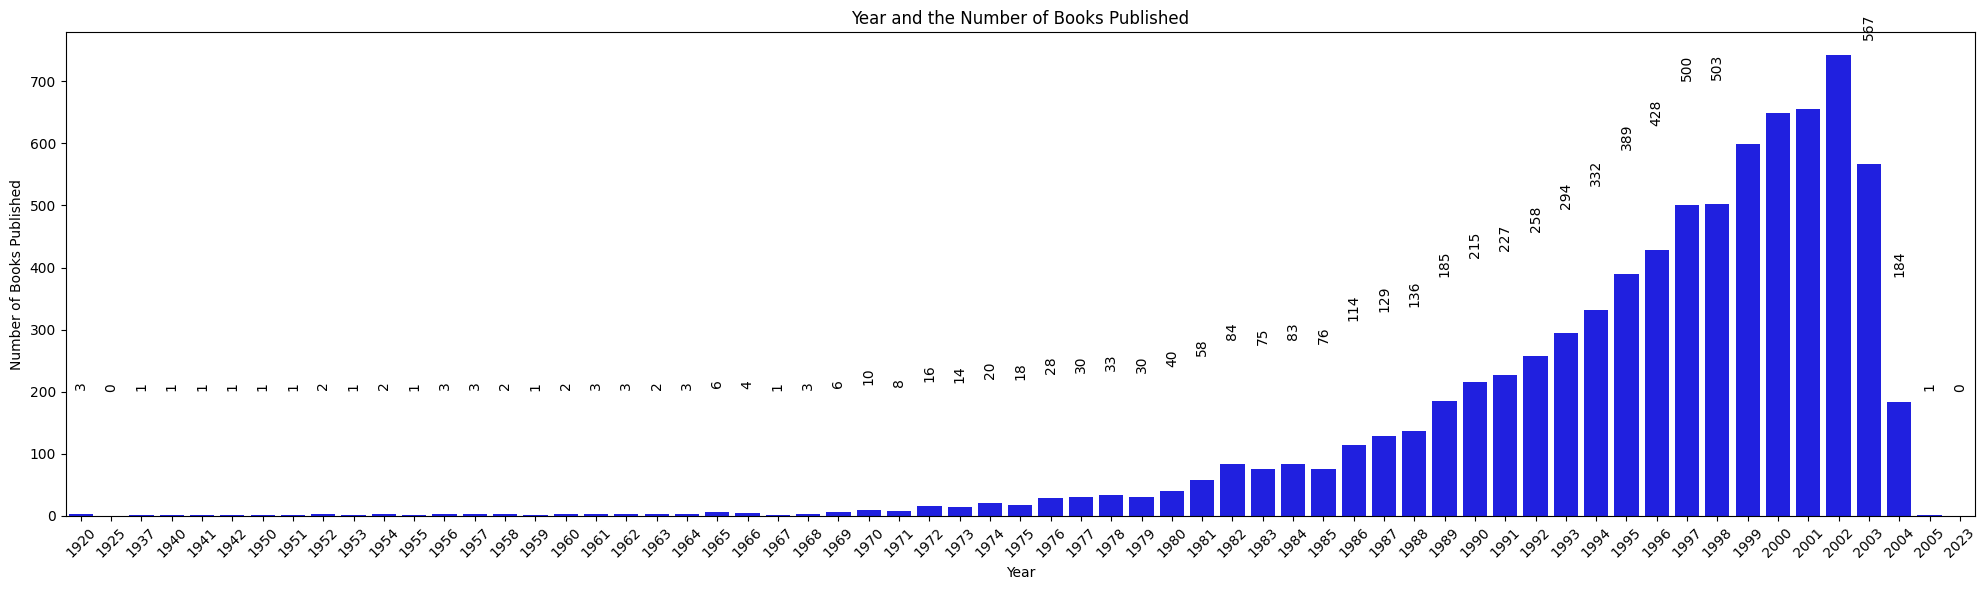

In [36]:
# Group by 'Year' and count the number of books published
yearly_book_count = clean_books.groupby('Year-Of-Publication')['Book-Title'].count().reset_index()

# Rename the columns for clarity
yearly_book_count.columns = ['Year', 'Number_of_Books']

# Sort by Year for better visualization
yearly_book_count.sort_values(by='Year', inplace=True)

# Plotting the bar chart
plt.figure(figsize=(20, 6))
bar_plot = sns.barplot(x='Year', y='Number_of_Books', data=yearly_book_count, color='blue')

# Customize the label of plot
plt.title('Year and the Number of Books Published')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')

# Give details
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{int(p.get_height())}',  # Convert height to int for position
        (p.get_x() + p.get_width() / 2, p.get_height() + 200), # Details position
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        color='black',
        fontsize=10,
        rotation=90 # Rotate details
    )

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

In [37]:
# Create 10-year intervals
clean_books['decade'] = (clean_books['Year-Of-Publication'] // 10) * 10

# Group by decade and calculate the percentage of books
decade_percentage = clean_books.groupby('decade')['Book-Title'].count() / len(clean_books) * 100

# Create a DataFrame and sort by percentage
decade_percentage_df = pd.DataFrame({'Decade': decade_percentage.index, 'Percentage': decade_percentage.values})
decade_percentage_df = decade_percentage_df.sort_values(by='Percentage', ascending=False)

decade_percentage_df

,Decade,Percentage
7,1990,47.988211
8,2000,35.866222
6,1980,12.557663
5,1970,2.652486
4,1960,0.422860
3,1950,0.217837
0,1920,0.038442
2,1940,0.038442
1,1930,0.012814
9,2020,0.000000


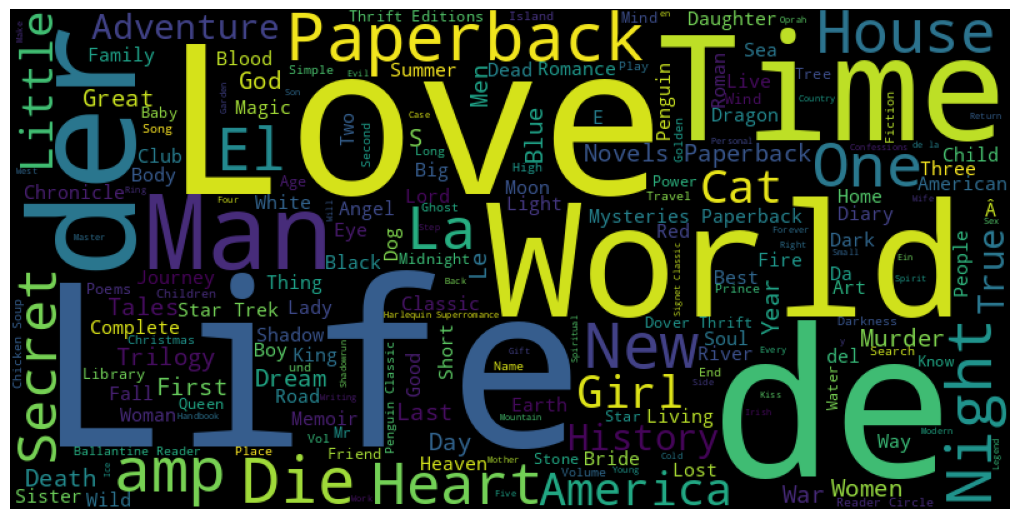

In [38]:
# Combine all book titles into a single string
text = " ".join(clean_books['Book-Title'].astype(str).tolist())

# Word yang tidak dianggep
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["Story", "Storie", "Stories", "Guide", "Tale", "Mystery", "book", "books", "edition", "series", "Novel"])

# Generate the word cloud with stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=custom_stopwords
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Make a new dataframe for the Baseline Model (Collaborative Filtering)

In [39]:
# Make new dataframe
ml_books = ratings.merge(clean_books, on='ISBN')
# Ml_books.head()
ml_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              28242 non-null  int64  
 1   ISBN                 28242 non-null  object 
 2   Book-Rating          28241 non-null  float64
 3   Book-Title           28242 non-null  object 
 4   Book-Author          28242 non-null  object 
 5   Year-Of-Publication  28242 non-null  Int64  
 6   Publisher            28242 non-null  object 
 7   Image-URL-S          28242 non-null  object 
 8   Image-URL-M          28241 non-null  object 
 9   Image-URL-L          28241 non-null  object 
 10  decade               28242 non-null  Int64  
dtypes: Int64(2), float64(1), int64(1), object(7)
memory usage: 2.4+ MB


In [40]:
ml_books.drop(columns = 'Image-URL-S', inplace= True) # Remove uneeded columns
ml_books.drop(columns = 'Image-URL-L', inplace= True)
ml_books.drop(columns = 'decade', inplace= True)
ml_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,276746,0425115801,0.0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...
2,276746,0449006522,0.0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...
3,276746,0553561618,0.0,Dark Paradise,TAMI HOAG,1994,Bantam,http://images.amazon.com/images/P/0553561618.0...
4,276746,055356451X,0.0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...


In [41]:
# See if there are any missing values in the new dataframe
ml_books.isna().sum()

,0
User-ID,0
ISBN,0
Book-Rating,1
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-M,1


In [42]:
# Changing the year of publication to the age of the book
ml_books['Year-Of-Publication'] = 2024 - ml_books['Year-Of-Publication']
ml_books.rename(columns = {'Year-Of-Publication': 'Age-Of-Book'}, inplace = True)
ml_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Age-Of-Book,Publisher,Image-URL-M
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,22,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,276746,0425115801,0.0,Lightning,Dean R. Koontz,28,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...
2,276746,0449006522,0.0,Manhattan Hunt Club,JOHN SAUL,22,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...
3,276746,0553561618,0.0,Dark Paradise,TAMI HOAG,30,Bantam,http://images.amazon.com/images/P/0553561618.0...
4,276746,055356451X,0.0,Night Sins,TAMI HOAG,29,Bantam,http://images.amazon.com/images/P/055356451X.0...


## Using the baseline model (Collaborative Filtering)

In [43]:
# Only process the popular books (books having at least 30 reviews)
y = ml_books.groupby('Book-Title').count()['Book-Rating'] >= 30
famous_books = y[y].index  # Get titles of popular books
final = ml_books[ml_books['Book-Title'].isin(famous_books)]
final.shape

(4630, 8)

In [44]:
# Create a pivot table where rows are books and columns are users, and values are ratings
pt = final.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')
pt.fillna(0, inplace = True)
pt

User-ID,8,9,14,16,26,44,51,67,91,99,...,278663,278692,278698,278755,278769,278781,278798,278832,278843,278844
Book-Title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Heartbreaking Work of Staggering Genius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Painted House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Prayer for Owen Meany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Where the Heart Is (Oprah's Book Club (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
White Oleander : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
White Oleander : A Novel (Oprah's Book Club),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0


In [45]:
# Modelling
similarity_scores = cosine_similarity(pt)

In [46]:
def recommend(book_name):
    # Find the index of the book
    index = np.where(pt.index == book_name)[0][0]
    # Get 10 most similar books
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:11]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Publisher'].values))

        data.append(item)
    return data

In [47]:
# The recommendation for users after reading Harry Potter and the Chamber of Secrets (Book 2)
rec = recommend("Harry Potter and the Chamber of Secrets (Book 2)")
for i in rec:
    print(i)

['Harry Potter and the Goblet of Fire (Book 4)', 'J. K. Rowling', 'Scholastic']
['Harry Potter and the Prisoner of Azkaban (Book 3)', 'J. K. Rowling', 'Scholastic']
['Balzac and the Little Chinese Seamstress : A Novel', 'DAI SIJIE', 'Anchor']
['We Were the Mulvaneys', 'Joyce Carol Oates', 'Plume']
['Snow Falling on Cedars', 'David Guterson', 'Harcourt']
['The Cider House Rules', 'John Irving', 'Bantam Books']
['The Last Time They Met : A Novel', 'Anita Shreve', 'Back Bay Books']
['The Red Tent (Bestselling Backlist)', 'Anita Diamant', 'Picador USA']
['Interview with the Vampire', 'Anne Rice', 'Ballantine Books']
["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))", 'J. K. Rowling', 'Arthur A. Levine Books']


## Using the proposed model (Hybrid Model)

In [48]:
# Loading rating dataset
ratings = pd.read_csv("Ratings.csv")
print(ratings.head())

   User-ID        ISBN  Book-Rating
0   276725  034545104X          0.0
1   276726  0155061224          5.0
2   276727  0446520802          0.0
3   276729  052165615X          3.0
4   276729  0521795028          6.0


Creating the Content Based Filtering Model for Hybrid

In [49]:
rating_amount = ml_books.groupby('Book-Title').count()['Book-Rating'].reset_index()
rating_amount.rename(columns={'Book-Rating': 'num_ratings'}, inplace=True)
rating_amount

,Book-Title,num_ratings
0,'48,1
1,01-01-00: A Novel of the Millennium,3
2,100 Best-Loved Poems (Dover Thrift Editions),3
3,"100 Great Fantasy Short, Short Stories",1
4,101 Bright Ideas: Esl Activities for All Ages,1
...,...,...
7480,"\The Twilight of the Idols (Classics S.)""",1
7481,de Parte de La Princesa Muerta,1
7482,iI Paradiso Degli Orchi,5
7483,"metamorfosis, La (ClÃ¡sicos selecciÃ³n series)",1


In [50]:
avg_rating = ml_books.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating

,Book-Title,avg_rating
0,'48,0.000000
1,01-01-00: A Novel of the Millennium,4.333333
2,100 Best-Loved Poems (Dover Thrift Editions),9.666667
3,"100 Great Fantasy Short, Short Stories",8.000000
4,101 Bright Ideas: Esl Activities for All Ages,0.000000
...,...,...
7480,"\The Twilight of the Idols (Classics S.)""",0.000000
7481,de Parte de La Princesa Muerta,7.000000
7482,iI Paradiso Degli Orchi,2.200000
7483,"metamorfosis, La (ClÃ¡sicos selecciÃ³n series)",8.000000


In [51]:
ml_books['text'] = ml_books['Book-Title'] + ', ' + ml_books['Book-Author'] + ', ' + ml_books['Publisher']
ml_books.dropna(subset=['text'], inplace=True)
ml_books['text'] = ml_books['text'].str.lower()

In [52]:
x = ml_books.copy()
x = x.sample(10000)
x = x.drop_duplicates(subset=['text']).reset_index(drop=True)
x['text'].duplicated().sum()

0

In [53]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(x['text']).toarray()
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Making the function and testing the Content Based Filtering model

In [54]:
def recom(title, cosine_sim=cosine_sim, num_recommend = 10):
    indices = pd.Series(x.index, index=x['Book-Title']).drop_duplicates()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar = sim_scores[1:num_recommend+1]
    movie_indices = [i[0] for i in top_similar]
    ret_df = pd.DataFrame(x['Book-Title'].iloc[movie_indices])
    ret_df['score'] = np.array(top_similar)[:,1]
    return ret_df

recom('Harry Potter and the Chamber of Secrets (Book 2)')

,Book-Title,score
2420,Harry Potter and the Goblet of Fire (Book 4),0.669032
778,Harry Potter and the Goblet of Fire (Book 4),0.636573
291,Harry Potter and the Sorcerer's Stone (Book 1),0.622192
214,Harry Potter and the Order of the Phoenix (Boo...,0.603137
807,Harry Potter and the Prisoner of Azkaban (Book 3),0.580306
127,Harry Potter and the Sorcerer's Stone (Harry P...,0.535283
1074,The Chamber,0.301250
59,The Chamber,0.283203
3734,The Sorcerer's Companion: A Guide to the Magic...,0.225975
4215,Little Women (Scholastic Classics),0.172990


Combining Content Based Filtering model with Collaborative filtering model

In [55]:
def normalize_scores(scores):
    scaler = MinMaxScaler()
    scores = scaler.fit_transform(np.array(scores).reshape(-1, 1)).flatten()
    return scores

def hybrid_recommend(book_name, cbf_weight=0.5, cf_weight=0.5, num_recommend=10):
    # CF Recommendations
    cf_rec = recommend(book_name)
    cf_df = pd.DataFrame(cf_rec, columns=['Book-Title', 'Book-Author', 'Publisher'])
    cf_df['score'] = normalize_scores(range(len(cf_df), 0, -1))  # CF implicit rank-based scoring

    # CBF Recommendations
    cbf_rec = recom(book_name)
    cbf_rec['score'] = normalize_scores(cbf_rec['score'])

    # Merge by Book-Title
    combined = pd.merge(cbf_rec, cf_df, on='Book-Title', how='outer', suffixes=('_cbf', '_cf')).fillna(0)

    # Hybrid Score: Weighted sum of CBF and CF scores
    combined['hybrid_score'] = combined['score_cbf'] * cbf_weight + combined['score_cf'] * cf_weight

    # Sort by hybrid score
    combined = combined.sort_values(by='hybrid_score', ascending=False).head(num_recommend)

    return combined[['Book-Title', 'hybrid_score']]

Testing out the Hybrid Model

In [56]:
hybrid_recommend("Harry Potter and the Chamber of Secrets (Book 2)", cbf_weight=0.6, cf_weight=0.4, num_recommend=10)

,Book-Title,hybrid_score
1,Harry Potter and the Goblet of Fire (Book 4),1.000000
2,Harry Potter and the Goblet of Fire (Book 4),0.960738
4,Harry Potter and the Prisoner of Azkaban (Book 3),0.848235
5,Harry Potter and the Sorcerer's Stone (Book 1),0.543343
3,Harry Potter and the Order of the Phoenix (Boo...,0.520295
6,Harry Potter and the Sorcerer's Stone (Harry P...,0.438221
0,Balzac and the Little Chinese Seamstress : A N...,0.311111
16,We Were the Mulvaneys,0.266667
9,Snow Falling on Cedars,0.222222
12,The Cider House Rules,0.177778
